# Import Library

In [ ]:
import pandas as pd
import os
import numpy as np
from zipfile import ZipFile
import csv
import string
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from os.path import exists
import shutil
from PIL import Image
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extract Data

In [ ]:
!cp "/content/drive/MyDrive/Capstone Bangkit/Machine Learning/Yoga.zip" /content

In [ ]:
with ZipFile("Yoga.zip", 'r') as a:
  a.extractall()

In [ ]:
# shutil.rmtree('my_model')

In [ ]:
PATH1 = "content/Yoga/"
FILE1 = os.listdir(PATH1)
a = 0
for i in FILE1:
  FILE2 = PATH1 + i + '/'
  for file_name in os.listdir(FILE2):
    file_path = FILE2 + file_name
    if file_name.endswith('.jpg'):
      try:
        img = Image.open(file_path) # open the image file
        img.verify() # verify that it is, in fact an image
      except (IOError, SyntaxError) as e:
        os.remove(file_path)
        a+=1
print(a,"Images are removed")

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


8202 Images are removed


In [ ]:
# PATH1 = "content/Yoga/"
# FILE1 = os.listdir(PATH1)
# a = 0
# for i in FILE1:
#   FILE2 = PATH1 + i + '/'
#   for file_name in os.listdir(FILE2):
#     file_path = FILE2 + file_name
#     img = cv2.imread(file_path)
#     # resize image by specifying custom width and height
#     try:
#       resized = cv2.resize(img, (300, 300))
#       cv2.imwrite(file_path, resized)
#       a+=1
#     except:
#       continue
# print(a,"Image are reshaped")

19547 Image are reshaped


In [ ]:
import random
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  all_files = []
    
  for file_name in os.listdir(SOURCE_DIR):
      file_path = SOURCE_DIR + file_name

      if os.path.getsize(file_path):
          all_files.append(file_name)
  
  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
  
  shuffled = random.sample(all_files, n_files)
  
  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]
  
  for file_name in train_set:
      shutil.copy2(SOURCE_DIR + file_name, TRAINING_DIR + file_name)
      
  for file_name in test_set:
      shutil.copy2(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)

In [ ]:
def rgb_to_gray(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [ ]:
!rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
PATH1 = "content/Yoga/"
FILE1 = os.listdir(PATH1)
for i in FILE1:
  a = 0
  FILE2 = PATH1 + i + '/'
  for file_name in os.listdir(FILE2):
    a+=1
  if a>=100:
    print(i,"has",a,"images")

Backpain: https://www.healthline.com/health/fitness-exercise/yoga-for-back-pain
- Downward-Facing Dog: 315
- Cobra Pose: 830
- Bridge Pose: 281
- Child Pose: 318
- Locust_Pose: 241

  Total: 2398

Anxiety: https://www.healthline.com/health/anxiety/yoga-for-anxiety 
- Tree Pose: 266
- Triangle Pose: 542
- Standing Forward Bend: 407
- Fish Pose: 305
- Child Pose: 381

  Total: 2126

Flexibility: https://www.healthline.com/health/exercise-fitness/yoga-for-flexibility 
- Plow Pose: 329
- Side Stretch Pose: 190
- Bow Pose: 239
- Low lunge: 261
- Cow Face Pose: 315

  Total: 1782

Neck Pain: https://www.healthline.com/health/yoga-for-neck-pain
- Standing_Forward_Bend: 407
- Warrior_II: 268
- Triangle Pose: 542
- Cow Face Pose: 315
- Corpse_Pose: 336

  Total: 2281


In [ ]:
backPain = ["Downward-Facing_Dog_pose_or_Adho_Mukha_Svanasana_", "Cobra_Pose_or_Bhujangasana_", "Bridge_Pose_or_Setu_Bandha_Sarvangasana_", "Child_Pose_or_Balasana_", "Locust_Pose_or_Salabhasana_"]
anxiety = ["Tree_Pose_or_Vrksasana_", "Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_", "Standing_Forward_Bend_pose_or_Uttanasana_", "Fish_Pose_or_Matsyasana_", "Child_Pose_or_Balasana_"]
flexibility = ["Plow_Pose_or_Halasana_", "Bow_Pose_or_Dhanurasana_", "Low_Lunge_pose_or_Anjaneyasana_", "Cow_Face_Pose_or_Gomukhasana_","Intense_Side_Stretch_Pose_or_Parsvottanasana_"]
neckPain = ["Standing_Forward_Bend_pose_or_Uttanasana_", "Warrior_II_Pose_or_Virabhadrasana_II_", "Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_", "Cow_Face_Pose_or_Gomukhasana_", "Corpse_Pose_or_Savasana_"]

#BackPain (Done)

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     preprocessing_function=rgb_to_gray,
                                     rotation_range=90,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                    #  shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                    #  fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(100, 100))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                          # preprocessing_function=rgb_to_gray,
                                          # rotation_range=40,
                                          # width_shift_range=0.2,
                                          # height_shift_range=0.2,
                                          # shear_range=0.2,
                                          # zoom_range=0.2,
                                          # horizontal_flip=True,
                                          # fill_mode='nearest'
                                          )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(100, 100))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
!mkdir backPain

In [ ]:
for i in range(len(backPain)):
  src = f"content/Yoga/{backPain[i]}"
  dst = f"backPain/data/{backPain[i]}"
  shutil.copytree(src, dst)

In [ ]:
!mkdir backPain/training

In [ ]:
!mkdir backPain/validation

In [ ]:
for i in range(5):
  !mkdir backPain/training/$i
  !mkdir backPain/validation/$i

In [ ]:
for i in range(5):
  source = f"/content/backPain/data/{backPain[i]}/"
  train = f"/content/backPain/training/{i}/"
  valid = f"/content/backPain/validation/{i}/"
  split = 0.9
  split_data(source, train, valid, split)

In [ ]:
TRAINING_DIR = "backPain/training"
VALIDATION_DIR = "backPain/validation"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1784 images belonging to 5 classes.
Found 201 images belonging to 5 classes.


In [ ]:
for i in range(1,1784):
  if 1784%i == 2:
    print(i)

In [ ]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
model3 = tf.keras.Sequential()
model3.add(VGG16(include_top = False,weights = 'imagenet',input_shape= (100,100,3)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(5,activation = 'softmax'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_6 (Dense)             (None, 5)                 23045     
                                                                 
Total params: 14,737,733
Trainable params: 14,737,733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
# Save your model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy')>0.90):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
# Train your model
history = model3.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/50
36/36 [==============================] - 49s 1s/step - loss: 1.4940 - accuracy: 0.4142 - val_loss: 1.4573 - val_accuracy: 0.4129
Epoch 2/50
36/36 [==============================] - 45s 1s/step - loss: 1.4489 - accuracy: 0.4204 - val_loss: 1.3848 - val_accuracy: 0.4378
Epoch 3/50
36/36 [==============================] - 43s 1s/step - loss: 1.3169 - accuracy: 0.4781 - val_loss: 0.9871 - val_accuracy: 0.6219
Epoch 4/50
36/36 [==============================] - 41s 1s/step - loss: 1.0856 - accuracy: 0.5762 - val_loss: 0.7952 - val_accuracy: 0.6716
Epoch 5/50
36/36 [==============================] - 42s 1s/step - loss: 0.9170 - accuracy: 0.6637 - val_loss: 0.6191 - val_accuracy: 0.7612
Epoch 6/50
36/36 [==============================] - 45s 1s/step - loss: 0.8198 - accuracy: 0.6956 - val_loss: 0.6958 - val_accuracy: 0.7363
Epoch 7/50
36/36 [==============================] - 41s 1s/step - loss: 0.7892 - accuracy: 0.6984 - val_loss: 0.5991 - val_accuracy: 0.7612
Epoch 8/50
36/36 [==

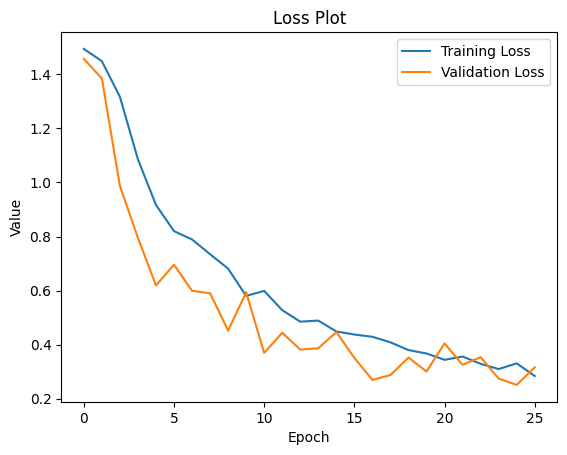

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

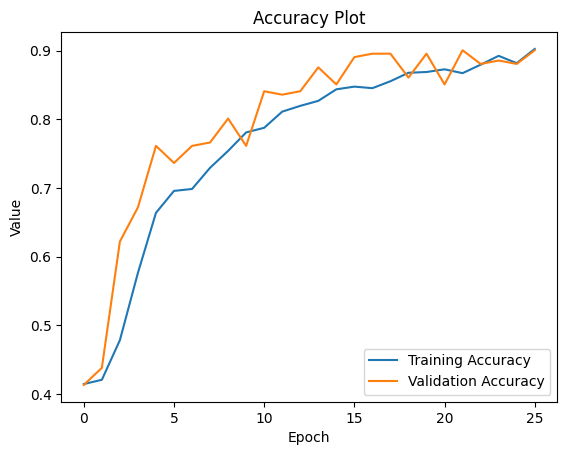

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving cobra.jpg to cobra (2).jpg
1/1 [==============================] - 0s 169ms/step
[[0. 1. 0. 0. 0.]]


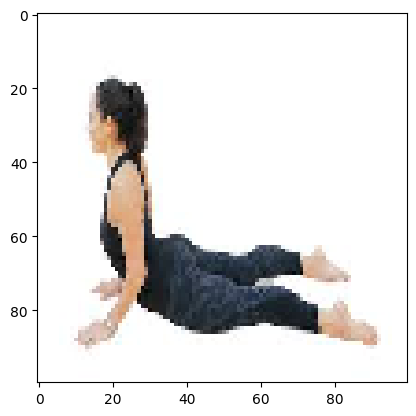

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)

  print(classes)

In [ ]:
model3.save('my_model')

In [ ]:
!zip -r backPain.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: my_model/variables/variables.index (deflated 71%)
  adding: my_model/assets/ (stored 0%)
  adding: my_model/fingerprint.pb (stored 0%)
  adding: my_model/saved_model.pb (deflated 90%)
  adding: my_model/keras_metadata.pb (deflated 96%)


In [ ]:
!cp backPain.zip "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/backPain"

In [ ]:
model3.save('backPain.h5')

In [ ]:
!cp backPain.h5 "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/backPain"

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("my_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('backPain.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!cp backPain.tflite "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/backPain"

#Anxiety

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     preprocessing_function=rgb_to_gray,
                                     rotation_range=45,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                    #  shear_range=0.4,
                                     zoom_range=0.4,
                                     horizontal_flip=True,
                                    #  fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(100, 100))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                          # preprocessing_function=rgb_to_gray,
                                          # rotation_range=40,
                                          # width_shift_range=0.2,
                                          # height_shift_range=0.2,
                                          # shear_range=0.2,
                                          # zoom_range=0.2,
                                          # horizontal_flip=True,
                                          # fill_mode='nearest'
                                          )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(100, 100))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
!mkdir anxiety

In [ ]:
for i in range(len(anxiety)):
  src = f"content/Yoga/{anxiety[i]}"
  dst = f"anxiety/data/{anxiety[i]}"
  shutil.copytree(src, dst)

In [ ]:
!mkdir anxiety/training

In [ ]:
!mkdir anxiety/validation

In [ ]:
for i in range(5):
  !mkdir anxiety/training/$i
  !mkdir anxiety/validation/$i

In [ ]:
for i in range(5):
  source = f"/content/anxiety/data/{anxiety[i]}/"
  train = f"/content/anxiety/training/{i}/"
  valid = f"/content/anxiety/validation/{i}/"
  split = 0.9
  split_data(source, train, valid, split)

In [ ]:
TRAINING_DIR = "anxiety/training"
VALIDATION_DIR = "anxiety/validation"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1652 images belonging to 5 classes.
Found 186 images belonging to 5 classes.


In [ ]:
for i in range(1,1652):
  if 1652%i==0:
    print(i)

In [ ]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
model3 = tf.keras.Sequential()
model3.add(VGG16(include_top = False,weights = 'imagenet',input_shape= (100,100,3)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(5,activation = 'softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 23045     
                                                                 
Total params: 14,737,733
Trainable params: 14,737,733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
# Save your model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy')>0.90):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
# Train your model
history = model3.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/50
34/34 [==============================] - 42s 1s/step - loss: 1.2769 - accuracy: 0.4492 - val_loss: 0.7638 - val_accuracy: 0.6344
Epoch 2/50
34/34 [==============================] - 39s 1s/step - loss: 0.8993 - accuracy: 0.6423 - val_loss: 0.5784 - val_accuracy: 0.7581
Epoch 3/50
34/34 [==============================] - 39s 1s/step - loss: 0.7324 - accuracy: 0.7125 - val_loss: 0.4192 - val_accuracy: 0.8387
Epoch 4/50
34/34 [==============================] - 40s 1s/step - loss: 0.6422 - accuracy: 0.7464 - val_loss: 0.5801 - val_accuracy: 0.7796
Epoch 5/50
34/34 [==============================] - 37s 1s/step - loss: 0.7001 - accuracy: 0.7209 - val_loss: 0.5959 - val_accuracy: 0.7634
Epoch 6/50
34/34 [==============================] - 38s 1s/step - loss: 0.5913 - accuracy: 0.7694 - val_loss: 0.4278 - val_accuracy: 0.8118
Epoch 7/50
34/34 [==============================] - 38s 1s/step - loss: 0.5831 - accuracy: 0.7748 - val_loss: 0.3552 - val_accuracy: 0.8710
Epoch 8/50
34/34 [==

Exception ignored in: <function _xla_gc_callback at 0x7fadaa004790>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 103, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


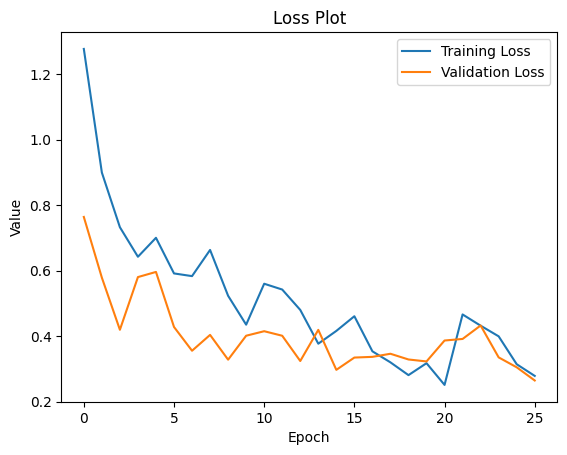

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

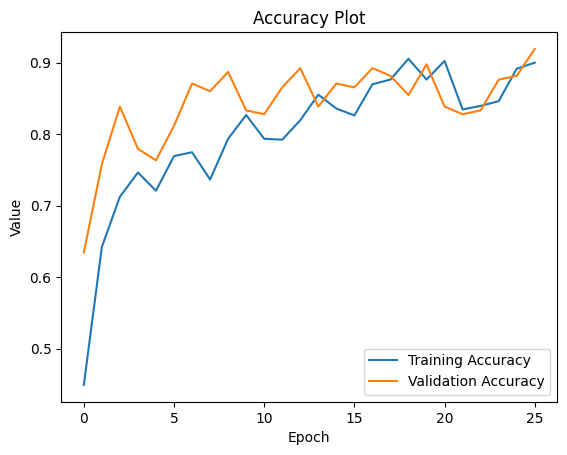

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving Tree.jpeg to Tree.jpeg
1/1 [==============================] - 1s 538ms/step
[[1. 0. 0. 0. 0.]]


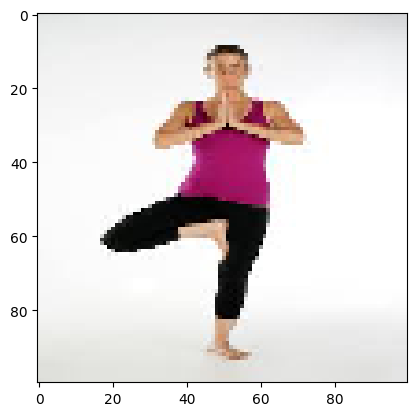

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)

  print(classes)

In [ ]:
model3.save('my_model')

In [ ]:
!zip -r anxiety.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.index (deflated 71%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: my_model/keras_metadata.pb (deflated 96%)
  adding: my_model/saved_model.pb (deflated 90%)
  adding: my_model/fingerprint.pb (stored 0%)
  adding: my_model/assets/ (stored 0%)


In [ ]:
!cp anxiety.zip "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/anxiety"

In [ ]:
model3.save('anxiety.h5')

In [ ]:
!cp anxiety.h5 "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/anxiety"

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("my_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('anxiety.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!cp all.tflite "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/anxiety"

#Flexibility (Done)

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     preprocessing_function=rgb_to_gray,
                                     rotation_range=45,
                                     width_shift_range=0.4,
                                     height_shift_range=0.4,
                                    #  shear_range=0.2,
                                     zoom_range=0.4,
                                     horizontal_flip=True,
                                    #  fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(100, 100))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                          # preprocessing_function=rgb_to_gray,
                                          # rotation_range=40,
                                          # width_shift_range=0.2,
                                          # height_shift_range=0.2,
                                          # shear_range=0.2,
                                          # zoom_range=0.2,
                                          # horizontal_flip=True,
                                          # fill_mode='nearest'
                                          )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(100, 100))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
!mkdir flexibility

In [ ]:
for i in range(len(flexibility)):
  src = f"content/Yoga/{flexibility[i]}"
  dst = f"flexibility/data/{flexibility[i]}"
  shutil.copytree(src, dst)

In [ ]:
!mkdir flexibility/training

In [ ]:
!mkdir flexibility/validation

In [ ]:
for i in range(5):
  !mkdir flexibility/training/$i
  !mkdir flexibility/validation/$i

In [ ]:
for i in range(5):
  source = f"/content/flexibility/data/{flexibility[i]}/"
  train = f"/content/flexibility/training/{i}/"
  valid = f"/content/flexibility/validation/{i}/"
  split = 0.9
  split_data(source, train, valid, split)

In [ ]:
TRAINING_DIR = "flexibility/training"
VALIDATION_DIR = "flexibility/validation"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1199 images belonging to 5 classes.
Found 135 images belonging to 5 classes.


In [ ]:
for i in range(1,1199):
  if 1199%i == 2:
    print(i)

3
7
9
19
21
57
63
133
171
399
1197


In [ ]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
model3 = tf.keras.Sequential()
model3.add(VGG16(include_top = False,weights = 'imagenet',input_shape= (100,100,3)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(5,activation = 'softmax'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 23045     
                                                                 
Total params: 14,737,733
Trainable params: 14,737,733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
# Save your model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy')>0.90):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
# Train your model
history = model3.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/50
24/24 [==============================] - 41s 1s/step - loss: 1.6435 - accuracy: 0.2269 - val_loss: 1.5989 - val_accuracy: 0.2444
Epoch 2/50
24/24 [==============================] - 28s 1s/step - loss: 1.5911 - accuracy: 0.2694 - val_loss: 1.5510 - val_accuracy: 0.4000
Epoch 3/50
24/24 [==============================] - 28s 1s/step - loss: 1.5650 - accuracy: 0.2811 - val_loss: 1.4556 - val_accuracy: 0.5037
Epoch 4/50
24/24 [==============================] - 28s 1s/step - loss: 1.5314 - accuracy: 0.3420 - val_loss: 1.3748 - val_accuracy: 0.4593
Epoch 5/50
24/24 [==============================] - 28s 1s/step - loss: 1.4843 - accuracy: 0.3628 - val_loss: 1.0991 - val_accuracy: 0.5778
Epoch 6/50
24/24 [==============================] - 28s 1s/step - loss: 1.3257 - accuracy: 0.4604 - val_loss: 0.9757 - val_accuracy: 0.6000
Epoch 7/50
24/24 [==============================] - 28s 1s/step - loss: 1.2025 - accuracy: 0.5238 - val_loss: 0.7601 - val_accuracy: 0.7111
Epoch 8/50
24/24 [==

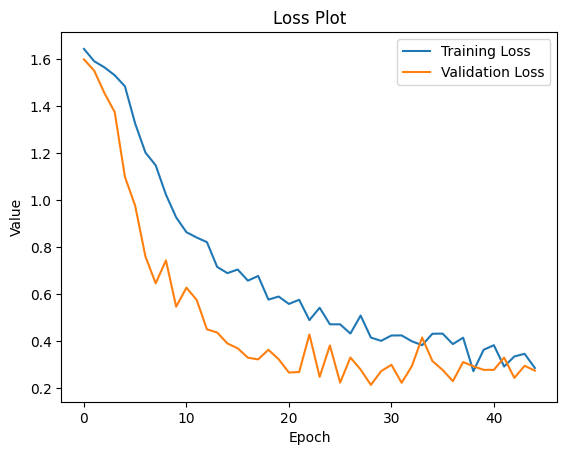

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

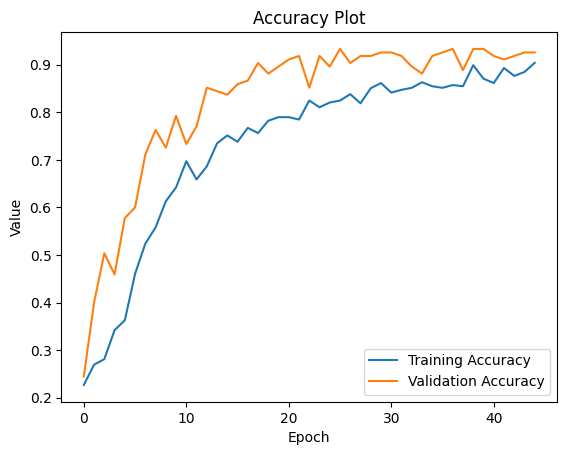

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving bow.jpeg to bow.jpeg
1/1 [==============================] - 1s 536ms/step
[[0. 1. 0. 0. 0.]]


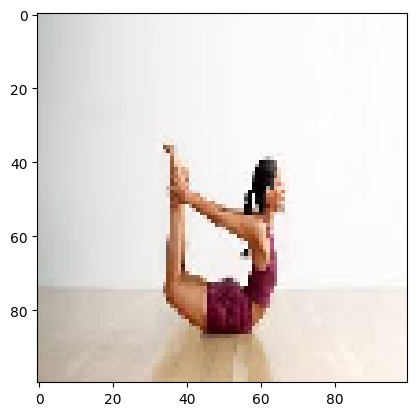

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)

  print(classes)

In [ ]:
model3.save('my_model')

In [ ]:
!zip -r flexibility.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.index (deflated 71%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: my_model/keras_metadata.pb (deflated 96%)
  adding: my_model/saved_model.pb (deflated 90%)
  adding: my_model/fingerprint.pb (stored 0%)
  adding: my_model/assets/ (stored 0%)


In [ ]:
!cp flexibility.zip "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/flexibility"

In [ ]:
model3.save('flexibility.h5')

In [ ]:
!cp flexibility.h5 "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/flexibility"

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("my_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('flexibility.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!cp flexibility.tflite "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/flexibility"

#NeckPain (Done)

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     preprocessing_function=rgb_to_gray,
                                     rotation_range=45,
                                     width_shift_range=0.4,
                                     height_shift_range=0.4,
                                    #  shear_range=0.4,
                                     zoom_range=0.4,
                                     horizontal_flip=True,
                                    #  fill_mode='nearest'
                                     )

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=50,
                                                      class_mode='categorical',
                                                      target_size=(100, 100))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                          # preprocessing_function=rgb_to_gray,
                                          # rotation_range=40,
                                          # width_shift_range=0.2,
                                          # height_shift_range=0.2,
                                          # shear_range=0.2,
                                          # zoom_range=0.2,
                                          # horizontal_flip=True,
                                          # fill_mode='nearest'
                                          )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=50,
                                                                class_mode='categorical',
                                                                target_size=(100, 100))
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
!mkdir neckPain

In [ ]:
for i in range(len(neckPain)):
  src = f"content/Yoga/{neckPain[i]}"
  dst = f"neckPain/data/{neckPain[i]}"
  shutil.copytree(src, dst)

In [ ]:
!mkdir neckPain/training

In [ ]:
!mkdir neckPain/validation

In [ ]:
for i in range(5):
  !mkdir neckPain/training/$i
  !mkdir neckPain/validation/$i

In [ ]:
for i in range(5):
  source = f"/content/neckPain/data/{neckPain[i]}/"
  train = f"/content/neckPain/training/{i}/"
  valid = f"/content/neckPain/validation/{i}/"
  split = 0.9
  split_data(source, train, valid, split)

In [ ]:
TRAINING_DIR = "neckPain/training"
VALIDATION_DIR = "neckPain/validation"
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1679 images belonging to 5 classes.
Found 189 images belonging to 5 classes.


In [ ]:
for i in range(1,1679):
  if 1679%i == 2:
    print(i)

3
13
39
43
129
559
1677


In [ ]:
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
model3 = tf.keras.Sequential()
model3.add(VGG16(include_top = False,weights = 'imagenet',input_shape= (100,100,3)))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(5,activation = 'softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 5)                 23045     
                                                                 
Total params: 14,737,733
Trainable params: 14,737,733
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.0001)
model3.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),optimizer = optimizer,metrics = ['accuracy'])

In [ ]:
# Save your model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy')>0.90):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()
# Train your model
history = model3.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


34/34 [==============================] - 52s 1s/step - loss: 1.6002 - accuracy: 0.2787 - val_loss: 1.5093 - val_accuracy: 0.3598
Epoch 2/50
34/34 [==============================] - 39s 1s/step - loss: 1.5460 - accuracy: 0.3115 - val_loss: 1.4765 - val_accuracy: 0.3862
Epoch 3/50
34/34 [==============================] - 39s 1s/step - loss: 1.4423 - accuracy: 0.3681 - val_loss: 1.1332 - val_accuracy: 0.6138
Epoch 4/50
34/34 [==============================] - 39s 1s/step - loss: 1.2257 - accuracy: 0.4949 - val_loss: 0.8273 - val_accuracy: 0.7143
Epoch 5/50
34/34 [==============================] - 42s 1s/step - loss: 1.0932 - accuracy: 0.5610 - val_loss: 0.6723 - val_accuracy: 0.7725
Epoch 6/50
34/34 [==============================] - 40s 1s/step - loss: 0.9200 - accuracy: 0.6552 - val_loss: 0.5347 - val_accuracy: 0.8254
Epoch 7/50
34/34 [==============================] - 40s 1s/step - loss: 0.8817 - accuracy: 0.6730 - val_loss: 0.4122 - val_accuracy: 0.8571
Epoch 8/50
34/34 [=============

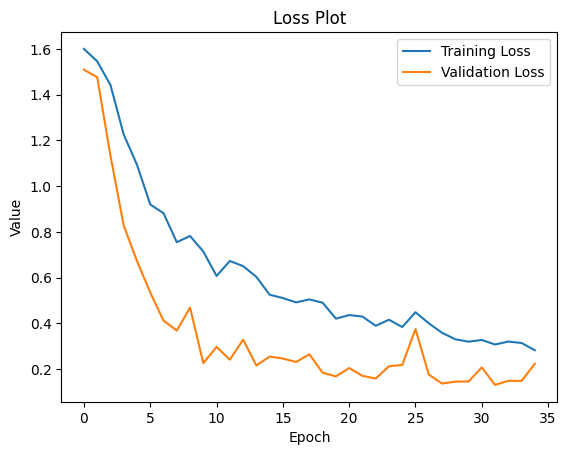

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

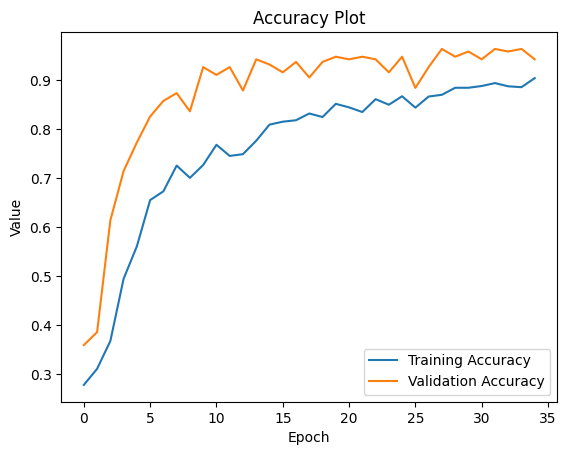

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving corpse.jpeg to corpse.jpeg
1/1 [==============================] - 1s 554ms/step
[[0. 0. 0. 0. 1.]]


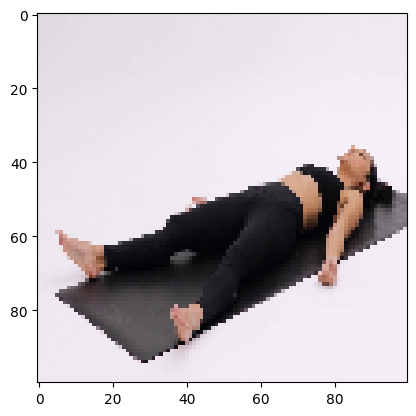

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = tf.keras.utils.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model3.predict(images, batch_size=10)

  print(classes)

In [ ]:
model3.save('my_model')

In [ ]:
!zip -r neckPain.zip my_model

  adding: my_model/ (stored 0%)
  adding: my_model/variables/ (stored 0%)
  adding: my_model/variables/variables.index (deflated 71%)
  adding: my_model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: my_model/keras_metadata.pb (deflated 96%)
  adding: my_model/saved_model.pb (deflated 91%)
  adding: my_model/fingerprint.pb (stored 0%)
  adding: my_model/assets/ (stored 0%)


In [ ]:
!cp neckPain.zip "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/neckPain"

In [ ]:
model3.save('neckPain.h5')

In [ ]:
!cp neckPain.h5 "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/neckPain"

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("my_model") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('neckPain.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
!cp neckPain.tflite "drive/MyDrive/Capstone Bangkit/Machine Learning/Imam/neckPain"